A ideia desse notebook, é explicar como realizar a leitura do arquivo do whats.

# Nova seção

In [1]:
#enconding=utf

In [178]:
#bibliotca para formatar data.
import datetime

#
from collections import Counter

#
import collections

#
import pandas as pd
import string
!pip install nltk
#
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Estudo para formatação de dados. </br>

link: https://stackabuse.com/converting-strings-to-datetime-in-python/ </br>



%Y: Year (4 digits) <br/>
%m: Month<br/>
%d: Day of month<br/>
%H: Hour (24 hour)<br/>
%M: Minutes<br/>
%S: Seconds<br/>
%f: Microseconds<br/>

In [4]:
msg1 = "[23/04/2020 22:00:26] Thiago: Boa galera: dfksadfhlsdfas :dfgdgdsfgdsfg"

In [5]:
msg1[21:].split(":")

[' Thiago', ' Boa galera', ' dfksadfhlsdfas ', 'dfgdgdsfgdsfg']

In [229]:
useful = []
list_datas = []
list_erros_formatacao = []
list_pessoas = []
list_msgs = []

with open ('/content/_chat.txt', "r", encoding='utf-8') as myfile:
    for line in myfile:
        if "[" in line:
            break
    for line in myfile:
          
          if(len(line.split(':'))>2):
             text=line[19:]
             msg = text[text[0:].find(':')+1:]
             contato=text[0:text[0:].find(':')+1]
             contato= contato.replace(']','')
             if(len(contato)>40):
               contato = contato.replace(contato,'')
          useful.append(line)
          if(line[0]=='[' and line[18]==']'):
             date_time_obj = line[0:19]
             date_time_obj = date_time_obj.replace('[','').replace(']','').lower()
             date_time_obj = pd.to_datetime(date_time_obj, infer_datetime_format=True)
             list_datas.append(date_time_obj)
             if(len(line.split(':'))>2):
                list_pessoas.append(contato[0:contato[0:].find(':')])
                list_msgs.append(msg)
a_string = "{}".join(useful)



myfile.close()

In [26]:
#ref_arquivo = open('/content/_chat.txt', "r", encoding='utf-8')
#linha = ref_arquivo.readline()

#list_datas = []
#list_erros_formatacao = []
#list_pessoas = []
#list_msgs = []

#while linha:
    #linha = ref_arquivo.readline()
    #try:
       #if(linha[1]!='[' or linha[2]!='['):
         #linha = '[' + linha
    #except(IndexError ):
      #pass
      #print((linha[21:].replace('  ','').replace(chr(10),'').replace('[','').replace(']','')))
    #print(linha[21:])
    #msg2=''
    #for linha in linha[21:]:
               #print(linha)
    #try:
           #date_time_obj = datetime.datetime.strptime(linha[1:21], '%d/%m/%Y %H:%M:%S')
           #list_datas.append(date_time_obj)
           #if(':' in linha):
              #msg=(linha[21:].replace('  ','').replace(chr(10),'').replace('[','').replace(']',''))
           #if(len(msg.split(':')) >= 1):
               #list_pessoas.append(msg.split(':')[0])
               #list_msgs.append((msg[msg.find(':')+2:]))
    #except ValueError:
        #list_erros_formatacao.append('Errors de formatação de data')
#ref_arquivo.close()

{'': 41, ' Matheus Braga': 373, ' Ricardo': 24, ' Rosendo': 98, ' Matheus Sistema': 11, ' Agropet': 23, ' Dirceu': 42, ' Sueli Aguia': 113, ' Alfa Materiais': 13, ' \u202a+55\xa011\xa097506‑6691\u202c': 4, ' \u202a+55\xa011\xa097535‑6110\u202c': 4, ' Danilo': 5, ' Anali': 12, ' Alfa Jacarei': 20, ' Andreia Aparecida ': 4, ' Ariana': 1, ' Gustavo': 292, ' Anali Takeuchi': 87, ' Danilo Faria': 60, ' Mitaly': 107, ' Rosineia': 24, ' Loja Compras': 186, ' Katia': 41, ' Jader': 52, ' Joyce Alfa': 311, ' Rafa Alfa': 20, ' Denis': 33, ' Marcelinho Alfa': 4, ' Doni RM Serraria': 7, ' RM Serraria ': 24, ' Renatinho': 13, ' Daniel Agropet ': 34, ' Diogo Caetano Alfa': 22, ' Leticia Laura': 10}


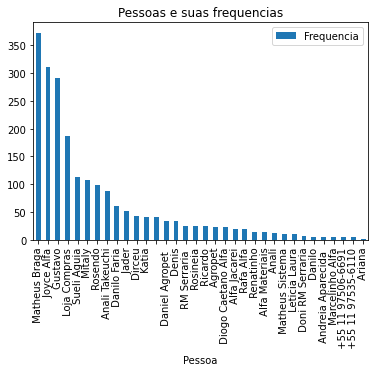

In [215]:
dict_pessoas = dict(Counter(list_pessoas))
print(dict_pessoas)
pessoas_df = pd.DataFrame(dict_pessoas.items(), columns=['Pessoa', 'Frequencia'])
pessoas_df = pessoas_df.sort_values(by=['Frequencia'], ascending=False)
pessoas_df.plot(kind='bar', x = 'Pessoa', y='Frequencia', title='Pessoas e suas frequencias')

In [166]:
pessoas_df['Pessoa']

1            Matheus Braga
24              Joyce Alfa
16                 Gustavo
21            Loja Compras
7              Sueli Aguia
19                  Mitaly
3                  Rosendo
17          Anali Takeuchi
18            Danilo Faria
23                   Jader
6                   Dirceu
22                   Katia
0                         
31         Daniel Agropet 
26                   Denis
29            RM Serraria 
20                Rosineia
2                  Ricardo
5                  Agropet
32      Diogo Caetano Alfa
13            Alfa Jacarei
25               Rafa Alfa
30               Renatinho
8           Alfa Materiais
12                   Anali
4          Matheus Sistema
33           Leticia Laura
28        Doni RM Serraria
11                  Danilo
14      Andreia Aparecida 
27         Marcelinho Alfa
9      ‪+55 11 97506‑6691‬
10     ‪+55 11 97535‑6110‬
15                  Ariana
Name: Pessoa, dtype: object

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128077 missing from current font.
  font.set_text(s, 0, flags=flags)


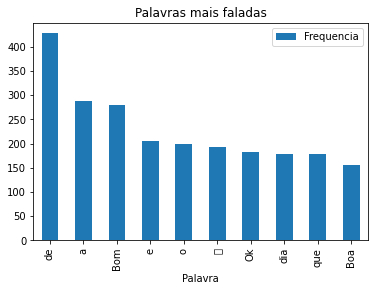

In [231]:
def contador_palavras(msgs):
    palavras = []
    for frases in msgs:
        for palavra in frases.split():
            palavras.append(palavra)
    return Counter(palavras)

palavras_dict = dict(contador_palavras(list_msgs))

palavras_df = pd.DataFrame(palavras_dict.items(), columns=['Palavra', 'Frequencia'])
palavras_df = palavras_df.sort_values(by=['Frequencia'], ascending=False)
palavras_df.head(10).plot(kind='bar', x = 'Palavra', y='Frequencia', title='Palavras mais faladas')

In [278]:
dia_da_semana = {
  6: "Domingo",
  0: "Segunda",
  1: "Terça",
  2: "Quarta",
  3: "Quinta",
  4: "Sexta",
  5: "Sábado"
}
list_horas = []
list_dia_semana = []
for data in list_datas:
    list_horas.append(data.time().hour)
    
    dias_da_semana =  dia_da_semana.get(data.weekday())
    list_dia_semana.append(dias_da_semana)
    
    #if(data.weekday() == 1):
        #list_dia_semana.append('segunda')
    #elif(data.weekday() == 2):
        #list_dia_semana.append('terca')
    #elif(data.weekday() == 3):
        #list_dia_semana.append('quarta')
    #elif(data.weekday() == 4):
        #list_dia_semana.append('quinta')
    #elif(data.weekday() == 5):
        #list_dia_semana.append('sexta')
    #elif(data.weekday() == 6):
        #list_dia_semana.append('sabado')
    #elif(data.weekday() == 0):
        #list_dia_semana.append('domingo')

In [279]:
dict_dia_semana = dict(Counter(list_dia_semana))

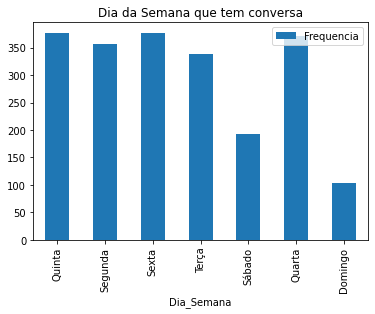

In [280]:
semana_df = pd.DataFrame(dict_dia_semana.items(), columns=['Dia_Semana', 'Frequencia'])
semana_df.plot(kind='bar', x = 'Dia_Semana', y='Frequencia', title='Dia da Semana que tem conversa')

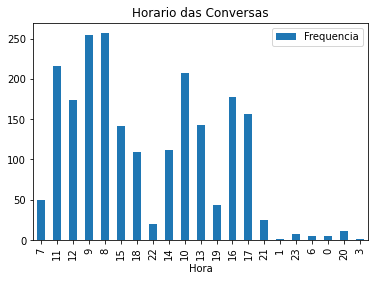

In [281]:
dict_horas = dict(Counter(list_horas))
horas_df = pd.DataFrame(dict_horas.items(), columns=['Hora', 'Frequencia'])
horas_df.plot(kind='bar', x = 'Hora', y='Frequencia', title='Horario das Conversas')

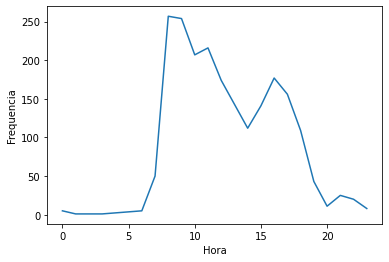

In [282]:
ax = sns.lineplot(x="Hora", y="Frequencia", data=horas_df, ci=68)